In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from functions import split

splitter_object = split.Splitter("./data", "|")

splitter_object.file_splitter("valeursfoncieres-2019.txt", "Nombre pieces principales", "vfoncieres_splitted")

Split fichier valeursfoncieres-2019.txt terminé


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
csv = pd.read_csv("./data/RAW/valeursfoncieres-2019.txt", sep = '|', decimal = ',', usecols = ['Nature mutation', 'Valeur fonciere', 'Code postal', 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot', 'Nombre de lots', 'Type local', 'Nombre pieces principales', "Surface terrain"])

In [4]:
csv = csv[["Valeur fonciere", "Code postal","Nombre de lots", "Surface Carrez du 1er lot", "Surface Carrez du 2eme lot", "Surface Carrez du 3eme lot", "Surface Carrez du 4eme lot", "Surface Carrez du 5eme lot", "Nombre pieces principales", "Surface terrain", "Type local"]][csv["Nature mutation"].str.contains("Vente", regex=True)]

In [5]:
csv = csv.dropna(subset=["Type local"])

In [6]:
csv = csv[["Valeur fonciere", "Code postal","Nombre de lots", "Surface Carrez du 1er lot", "Surface Carrez du 2eme lot", "Surface Carrez du 3eme lot", "Surface Carrez du 4eme lot", "Surface Carrez du 5eme lot", "Nombre pieces principales", "Surface terrain"]][csv["Type local"].str.contains("Appartement|Maison", regex=True)]

In [7]:
csv["Carrez total"] = csv[["Surface Carrez du 1er lot", "Surface Carrez du 2eme lot", "Surface Carrez du 3eme lot", "Surface Carrez du 4eme lot", "Surface Carrez du 5eme lot"]].sum(axis=1)

In [8]:
csv2 = csv.drop(columns=["Surface Carrez du 1er lot", "Surface Carrez du 2eme lot", "Surface Carrez du 3eme lot", "Surface Carrez du 4eme lot", "Surface Carrez du 5eme lot"])

In [11]:
csv2 = csv2.dropna(subset=['Valeur fonciere'])
csv2 = csv2.dropna(subset=['Code postal'])
csv2 = csv2.dropna(subset=['Carrez total'])
csv2 = csv2[csv2["Nombre de lots"] < 6]

In [12]:
csv2

,Valeur fonciere,Code postal,Nombre de lots,Nombre pieces principales,Surface terrain,Carrez total
0,37220.0,1000.0,1,1.0,NaN,19.27
1,185100.0,1000.0,2,3.0,NaN,61.51
3,209000.0,1160.0,0,4.0,940.0,0.00
4,134900.0,1370.0,0,5.0,490.0,0.00
5,192000.0,1340.0,0,4.0,708.0,0.00
...,...,...,...,...,...,...
2535783,17521000.0,75004.0,0,1.0,470.0,0.00
2535784,17521000.0,75004.0,0,2.0,470.0,0.00
2535785,17521000.0,75004.0,0,4.0,470.0,0.00
2535786,17521000.0,75004.0,0,5.0,470.0,0.00


&lt;AxesSubplot:xlabel=&#39;Carrez total&#39;&gt;

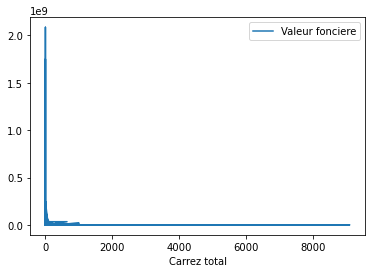

In [34]:
csv2.plot(y='Valeur fonciere', x='Carrez total')
